In [105]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import alpha
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures


In [106]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [107]:
df = pd.read_csv(filepath)

In [108]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [109]:
df.head(10)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,5,5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,6,6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0
7,7,7,Acer,3,2,1,5,15.0,0.551724,4,256,4.85100,866,Low,0,1
8,8,8,Dell,3,1,1,5,15.6,0.862069,4,256,5.07150,812,Low,1,0
9,9,9,Acer,3,3,1,7,15.0,0.620690,8,256,4.85100,1068,Low,0,1


In [110]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
#df.drop(['Manufacturer','Price-binned'], axis=1, inplace=True)

In [111]:
df.head(10)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0
5,Dell,3,1,1,5,15.6,0.551724,8,256,4.85100,1016,Low,1,0
6,HP,3,3,1,5,15.6,0.551724,8,256,4.63050,1117,Low,1,0
7,Acer,3,2,1,5,15.0,0.551724,4,256,4.85100,866,Low,0,1
8,Dell,3,1,1,5,15.6,0.862069,4,256,5.07150,812,Low,1,0
9,Acer,3,3,1,7,15.0,0.620690,8,256,4.85100,1068,Low,0,1


In [112]:
y_data = df['Price']
x_data = df.drop(['Price'], axis=1)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


In [114]:
print(x_train['CPU_frequency'].dtype)
print(x_train['CPU_frequency'].head())

float64
234    0.827586
237    0.793103
67     0.620690
179    0.862069
39     0.551724
Name: CPU_frequency, dtype: float64


In [115]:
model = LinearRegression()
model.fit(x_train[["CPU_frequency"]], y_train)

LinearRegression()

In [116]:
print(model.score(x_train[["CPU_frequency"]], y_train))
print(model.score(x_test[["CPU_frequency"]], y_test))

0.14829792099817984
-0.06599437350393811


In [117]:
R_cross = cross_val_score(model,x_data[["CPU_frequency"]], y_data, cv =4)
print("The mean of the fold are: ", R_cross.mean(), "& the standard deviation: ", R_cross.std())

The mean of the fold are:  -0.16109232388595096 & the standard deviation:  0.3849579786664708


In [118]:
# Task 2 : Overfitting

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=0)

In [121]:
model_1 = LinearRegression()
RS_test =[]
order =[1,2,3,4,5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(X_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(X_test[['CPU_frequency']])
    model_1.fit(x_train_pr, Y_train)
    RS_test.append(model_1.score(x_test_pr, Y_test))
    

In [122]:
print(RS_test)

[0.05322174176198102, -0.026920818678998204, 0.051563457925578815, -0.9948137915477286, -1.3759360956329476]


Text(0.5, 1.0, 'RS vs order')

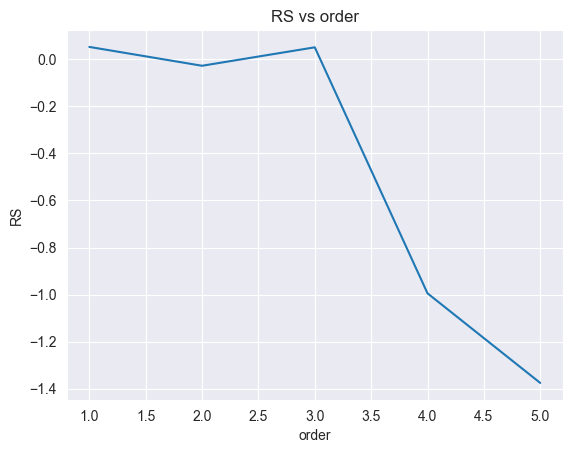

In [123]:
plt.plot(order, RS_test)
plt.xlabel('order')
plt.ylabel('RS')
plt.title('RS vs order')

In [124]:
# Target Regression

In [135]:
from tqdm import tqdm
from sklearn.linear_model import Ridge


# Chia dữ liệu và tạo đặc trưng đa thức
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(x_data, y_data, test_size=0.20, random_state=0)
prR = PolynomialFeatures(degree=2)
features = ['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']
x_train_PRr = prR.fit_transform(X_train_1[features])
x_test_PRr = prR.fit_transform(X_test_1[features])

# Khởi tạo danh sách lưu kết quả
RSPU_train = []
PSPU_test = []

# Dãy giá trị alpha
Alpha = np.arange(0.001, 1, 0.001)

# Sử dụng tqdm để theo dõi tiến trình
pbar = tqdm(Alpha)
for alpha in pbar:
    Ridge_model = Ridge(alpha=alpha)
    Ridge_model.fit(x_train_PRr, Y_train_1)
    
    # Tính toán đúng cách
    train_score = Ridge_model.score(x_train_PRr, Y_train_1)
    test_score = Ridge_model.score(x_test_PRr, Y_test_1)
    
    # Cập nhật tiến trình
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    
    # Lưu kết quả
    PSPU_test.append(test_score)
    RSPU_train.append(train_score)


100%|██████████| 999/999 [00:04<00:00, 243.06it/s, Test Score=0.324, Train Score=0.655]


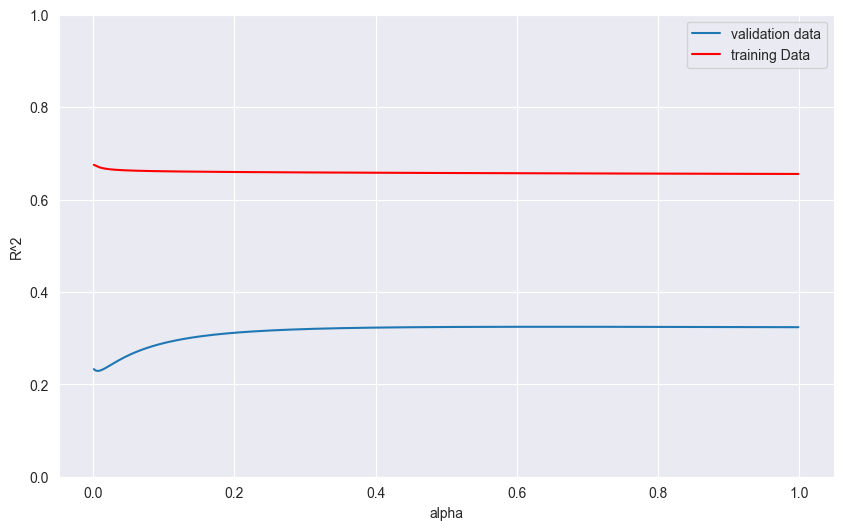

In [136]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, PSPU_test, label='validation data')
plt.plot(Alpha, RSPU_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [137]:
# Grid search

In [138]:
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [140]:
from sklearn.model_selection import GridSearchCV

RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [141]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [142]:
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))

0.2447803981790707
